<a href="https://colab.research.google.com/github/reubenvas/Clustering-analysis-of-Copenhagen-Network-Study/blob/main/Data_cleanup_MASTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

# Setup
For mounting and running in google colab

In [ ]:
# #Mount personal drive and move into main directory
from google.colab import drive
drive.mount('/content/drive')
import os

os.chdir('drive')
os.chdir('MyDrive')
os.chdir("Data Mining Project")
os.chdir("Notebooks and data")
os.getcwd() #Get current working directory


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

# Data Clean-Up and Exploration

## Importing interaction data
Using code provided in the Copenhagen Netowork Study

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import itertools

DATA_DIR = "./data_dump/"
DATA_FILENAMES = {"bluetooth": "bt_symmetric.csv",
                  "calls": "calls.csv",
                  "sms": "sms.csv",
                  "facebook_friends": "fb_friends.csv",
                  "genders": "genders.csv"}


def LoadData(data_filename, data_dir):
    '''Loads data from |data_dir|/|data_filename|. Returns Pandas dataframe.'''
    return pd.read_csv(os.path.join(data_dir, data_filename))


df_bt = LoadData(DATA_FILENAMES["bluetooth"], DATA_DIR)
print("bluetooth\n", df_bt.head())

df_calls = LoadData(DATA_FILENAMES["calls"], DATA_DIR)
print("\ncalls\n", df_calls.head())

df_sms = LoadData(DATA_FILENAMES["sms"], DATA_DIR)
print("\nsms\n", df_sms.head())

df_facebook_friends = LoadData(DATA_FILENAMES["facebook_friends"], DATA_DIR)
print("\nfacebook friends\n", df_facebook_friends.head())

df_genders = LoadData(DATA_FILENAMES["genders"], DATA_DIR)
print("\ngenders\n", df_genders.head())



bluetooth
    # timestamp  user_a  user_b  rssi
0            0       0      -1     0
1            0       1      -1     0
2            0       2      -1     0
3            0       3      -2   -88
4            0       5      -1     0

calls
    timestamp  caller  callee  duration
0        184     300     301       121
1       3920     512     299       670
2       5623     301     300       504
3       9252     401     457        -1
4      15466     512       0         5

sms
    timestamp  sender  recipient
0         18     370        512
1         37     512        370
2        126     370        512
3        134       0        512
4        312     137        136

facebook friends
    # user_a  user_b
0         0     512
1         0     263
2         0     525
3         0     285
4         0     543

genders
    # user  female
0       0       0
1       2       0
2       3       0
3       4       0
4       5       0


## Cleaning and pre-processing Bluetooth Data - Vilmer Olin
Cleaning and processing bluetooth data. Running the code creates the unprocessed 847x847 matrix "df_bt_instances"

In [ ]:
## bestämma logik för att bestämma avstånd bluetooth sensor data

print(df_bt.shape)
df_bt = df_bt[df_bt['user_b'] != -1]
df_bt = df_bt[df_bt['user_b'] != -2]

#print("Number of timestamps: ", len(df_bt['# timestamp'].unique()))
print("Number of senders: ", len(df_bt['user_a'].unique()))
print("Number of recievers: ", len(df_bt['user_b'].unique()))

print("Highest participant ID: ", max(df_bt['user_a'].max(), df_bt['user_b'].max()))
#df_bt = df_bt[df_bt['user_a'] == 15]

df_bt.drop('# timestamp', inplace=True, axis=1)
df_bt.drop('rssi', inplace=True, axis=1)

# eventuell normalisering/standardisering ska inte ta bort outliers

(5474289, 4)
Number of senders:  676
Number of recievers:  676
Highest participant ID:  845


<ipython-input-70-cf496aba69c6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bt.drop('# timestamp', inplace=True, axis=1)
<ipython-input-70-cf496aba69c6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bt.drop('rssi', inplace=True, axis=1)


In [ ]:
shape = (847, 847)
df_bt_instances = pd.DataFrame(np.zeros(shape), index=range(shape[0]), columns=range(shape[1]))

# Count occurrences in df_bt and fill df_bt_instances
counts = df_bt.groupby(["user_a", "user_b"]).size().reset_index(name="count")
for _, row in counts.iterrows():
    user_a = row["user_a"]
    user_b = row["user_b"]
    count = row["count"]
    df_bt_instances.at[user_a, user_b] = count
    df_bt_instances.at[user_b, user_a] = count

In [ ]:
print(df_bt_instances.shape)

print(df_bt.shape)
print(len(df_bt[(df_bt["user_a"]) > (df_bt["user_b"])]))

print("Average number of pings between participants: ", df_bt_instances[df_bt_instances != 0].mean().mean())

max_value = df_bt_instances.values.max()
max_indices = np.where(df_bt_instances.values == max_value)
row_index, col_index = max_indices
print("Highest number of pings between two participants: ", max_value, " Which occurs at: ", row_index[0], ',', col_index[0])

(847, 847)
(2426279, 2)
2426279
Average number of pings between participants:  29.878739756714875
Highest number of pings between two participants:  5766.0  Which occurs at:  321 , 322


In [ ]:
df_bt_instances.head()

,0,1,2,3,4,5,6,7,8,9,...,837,838,839,840,841,842,843,844,845,846
0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,131.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("Bluetooth instances between user 300 and 301: ", df_bt_instances.loc[300, 301])
print("Bluetooth instances between user 301 and 300: ", df_bt_instances.loc[301, 300])

Bluetooth instances between user 300 and 301:  4074.0
Bluetooth instances between user 301 and 300:  4074.0


In [ ]:
# list the nr of instances which are 0
print("Number of instances which are 0: ", len(df_bt_instances[df_bt_instances == 0].stack()))

Number of instances which are 0:  558349


## Cleaning and pre-processing SMS data - Vilmer B
Cleaning and pre-processing SMS data. Running the code creates the unprocessed 847x847 matrix call df_sms_counts

Exploring data in df_sms it has the columns "timestamp", "sender", "recipient"

In [ ]:
print("Number of sms: ", len(df_sms))
print("Number of senders: ", len(df_sms["sender"].unique()))
print("Number of recipients: ", len(df_sms["recipient"].unique()))
print("Number of senders and recipients (union): ", len(set(df_sms["sender"].unique()).union(set(df_sms["recipient"].unique()))))
print("Number of senders and recipients (intersect): ", len(set(df_sms["sender"].unique()).intersection(set(df_sms["recipient"].unique()))))
print("Highest participant ID: ", max(df_sms["sender"].max(), df_sms["recipient"].max()))


Number of sms:  24333
Number of senders:  555
Number of recipients:  555
Number of senders and recipients (union):  568
Number of senders and recipients (intersect):  542
Highest participant ID:  846


The highest participant number found in this DataFrame is 846 meaning a total of 847 participants, resulting in a dataframe of size 847x847. Our approach here is to measure the SMS "activity" between two participants by the number of text messages sent between them during the entire duration of the study. No distinction is made between sent and received messages, and no distinction is made for time of day.

In [ ]:
# Group by sender and recipient and count the number of SMS
grouped_sms = df_sms.groupby(['sender', 'recipient']).size().reset_index(name='counts')

# Create an empty DataFrame filled with zeros
max_participant_id = max(df_sms['sender'].max(), df_sms['recipient'].max())
df_sms_counts = pd.DataFrame(0, index=range(max_participant_id + 1), columns=range(max_participant_id + 1))

We now have a dataframe filled with zeroes, where columns and rows represent participants. The intersection between the rows and columns will contain the activity between those two participants.

Now populating the table by counting the number of SMS between participants and adding it to the corresponding cell in the table.

In [ ]:
# Fill the DataFrame using the grouped data
for index, row in grouped_sms.iterrows():
    df_sms_counts.at[row['sender'], row['recipient']] = row['counts']

Looking at two random interactions to make sure it looks reasonable

In [ ]:
print("Sms between user 300 and 301: ", df_sms_counts.loc[300, 301])
print("Sms between user 301 and 300: ", df_sms_counts.loc[301, 300])

Sms between user 300 and 301:  51
Sms between user 301 and 300:  44


We now have a dataframe consisting of the number of interactions between all participants.

In [ ]:
# Counting the average value of the cells that are not equal to zero
print("Average number of SMS between participants: ", df_sms_counts[df_sms_counts != 0].mean().mean())

Average number of SMS between participants:  19.22114328614329


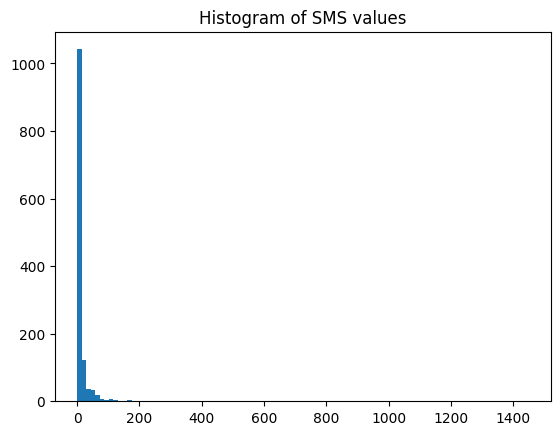

In [ ]:
df_non_zero = df_sms_counts[df_sms_counts != 0]
sms_value_array = df_non_zero.stack().values
plt.hist(sms_value_array, bins=100)
plt.title("Histogram of SMS values")
plt.show()


Doing a quick cluster analysis on df_sms_counts

Sammanför alla 3 data till en "tabell"

In [ ]:
## sammanföra till en stor tabell, typ matris

# input: 3st : varje individuell frame shape 700 x 700
# output: 1st: one frame shape 700 x 2100 (rader x kolumner)

## Cleaning and pre-processing Call Data - Reuben
Running the code results in the 847x847 matrix called "df_calls_matrix"

The goal of this table is to measure the activity in terms of calls between participants.

### Exploring data

In [ ]:
# Exploring data in df_calls it has the columns "timestamp", "caller", "callee" and "duration"
print("Number of calls: ", len(df_calls))
print("Number of callers: ", len(df_calls["caller"].unique()))
print("Number of callees: ", len(df_calls["callee"].unique()))
print("Number of callers and callees: ", len(set(df_calls["caller"].unique()).union(set(df_calls["callee"].unique()))))
print("Number of callers and callees (intersection): ", len(set(df_calls["caller"].unique()).intersection(set(df_calls["callee"].unique()))))


Number of calls:  3600
Number of callers:  449
Number of callees:  480
Number of callers and callees:  536
Number of callers and callees (intersection):  393


In [ ]:
# explore the calls which have duration 0 and -1

print("Number of calls with duration -1: ", len(df_calls[df_calls["duration"] == -1]))
print("Number of calls with duration 0: ", len(df_calls[df_calls["duration"] == 0]))
print("Number of calls with duration less than 5: ", len(df_calls[df_calls["duration"] < 5]))


Number of calls with duration -1:  366
Number of calls with duration 0:  580
Number of calls with duration less than 5:  1607


### Filter irrelevant calls

#### Filter missed calls
The amount of missed calls doesn't really contribute to our investigation since if two people are trying to reach each other they will likely reach each other sooner or later. Thus, all the calls and recalls back and forth that may happen when two people are trying to reach each other are not really relevant as its only the actual successful call that matters and perhaps its duration. Thus, we will only consider the actual calls and not the missed calls.

#### Filter calls with low duration
Furthermore, we may look at the duration for each call as well. This may give us some insight into the nature of the call. For example, if the duration is very short it may indicate that the call was not successful or that the call was very short and thus not very important. On the other hand, if the duration is very long it may indicate that the call was very important and thus may be more relevant to our investigation. Thus, we will also consider calls with a low duration as noice and not relevant to our investigation...

In [ ]:
# remove calls with duration lower than X, this removes missed calls also
duration_limit = 5

df_calls = df_calls[df_calls["duration"] > duration_limit]
print("Number of calls (w/ duration >", duration_limit, '):', len(df_calls))

print("Most common call duration (w/o duration 0,-1): ", df_calls["duration"].value_counts().idxmax())

Number of calls (w/ duration > 5 ): 1932
Most common call duration (w/o duration 0,-1):  6


In [ ]:
df_calls

,timestamp,caller,callee,duration
0,184,300,301,121
1,3920,512,299,670
2,5623,301,300,504
5,15497,512,0,28
6,26400,19,47,619
...,...,...,...,...
3593,2412958,546,139,83
3594,2413081,546,139,83
3595,2414934,706,401,78
3596,2415585,218,382,48


### Logic for calculating caller score
In the resulting dataframe each caller to callee pair will have a score that is calculated as follows:

1. The duration of each call between the caller and callee pair is summed up. This is done to give a higher score to pairs that have a high duration and a high number of calls.
2. *(not implemented)* Each call duration is multiplied by a bonus depending on the time of day. This is done because we assume that calls during the night are more important than calls during the day.



In [ ]:
# create a new dataframe with 900 rows and 900 columns, where each row corresponds to a user, and each column corresponds to a user that the row user has called. The value in the cell is the sum of the duration of all calls between the two users.
# This is a symmetric matrix, so we only need to calculate the upper triangle of the matrix, and then copy the values to the lower triangle.
# The diagonal is filled with 0s, since a user cannot call himself.

# create a list of all users
users = list(set(df_calls["caller"].unique()).union(set(df_calls["callee"].unique())))
print("Number of users: ", len(users))

# create a dataframe with 0s
user_indexes = np.arange(0, max(users)+1)
df_calls_matrix = pd.DataFrame(0, index=user_indexes, columns=user_indexes) # also creates rows for user ids inbetween the exisiting ones

# fill the dataframe with the sum of the duration of all calls between the two users
for index, row in df_calls.iterrows():
    df_calls_matrix.loc[row["caller"], row["callee"]] += row["duration"]

df_calls_matrix.head()

Number of users:  484


,0,1,2,3,4,5,6,7,8,9,...,837,838,839,840,841,842,843,844,845,846
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# output row 300 and column 301 from the matrix
print("Calls between user 300 and 301: ", df_calls_matrix.loc[300, 301])
print("Calls between user 301 and 300: ", df_calls_matrix.loc[301, 300])


Calls between user 300 and 301:  892
Calls between user 301 and 300:  967


Shiow a histogram of the values in the matrix (excluding the 0s) to see the distribution of the call durations between the users in the dataset and print the median and mean of the values in the matrix (excluding the 0s) from the hist plot.

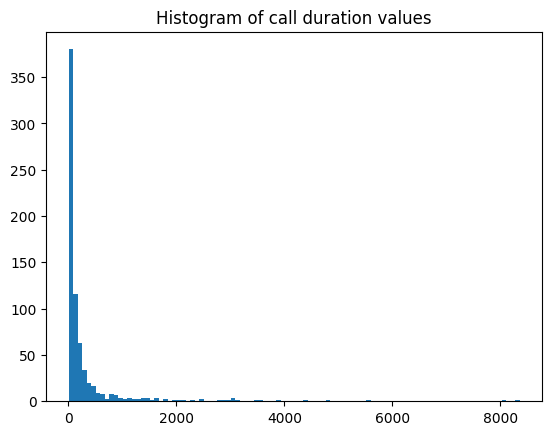

Share of non-zero call scroes out of all call scores: 0.11806375442739078%
The following printouts excludes the 0s in the matrix
Median value of calls:  78.0
Mean value of calls:  286.1452750352609
Standard deviation of calls:  714.6980997719178
Interquartile range of calls:  173.0
25th percentile of calls:  38.0
75th percentile of calls:  211.0


In [ ]:

df_non_zero = df_calls_matrix[df_calls_matrix != 0]
calls_value_array = df_non_zero.stack().values

plt.hist(calls_value_array, bins=100)
plt.title("Histogram of call duration values")
plt.show()

full_matrix_length = len(df_calls_matrix) * len(df_calls_matrix)
print("Share of non-zero call scroes out of all call scores: " + str(len(df_non_zero) / full_matrix_length * 100) + "%")

print('The following printouts excludes the 0s in the matrix')

print("Median value of calls: ", np.median(calls_value_array))
print("Mean value of calls: ", calls_value_array.mean())

# print the std and icq and percentiles of the values in the matrix (excluding the 0s)
print("Standard deviation of calls: ", calls_value_array.std())
print("Interquartile range of calls: ", np.quantile(calls_value_array,0.75) - np.quantile(calls_value_array, 0.25))
print("25th percentile of calls: ", np.quantile(calls_value_array, 0.25))
print("75th percentile of calls: ", np.quantile(calls_value_array, 0.75))



# Pre-Processing and Transformation

## Transformation and standardisation

### Method 1 - Log transformation + Standardization
**Rationale:** Applying logarithmic transformation to all of the values in the dataframe will dampen the impact of high outliers on the cluster crea

#### SMS Data

In [ ]:
# Applying logarithmic function to all cells, adding 1 to avoid log(0) error
df_sms_matrix_log = df_sms_counts.applymap(lambda x: np.log(x + 1))

# apply standardization to all cells
max_val_sms = max(df_sms_matrix_log.stack().values)
min_val_sms = min(df_sms_matrix_log.stack().values)

df_sms_instances_log_standardization = (df_sms_matrix_log - min_val_sms) / (max_val_sms - min_val_sms)

# set each diagonal value to the max value in that in each elements column
for i in range(len(df_sms_instances_log_standardization)):
    df_sms_instances_log_standardization.iloc[i, i] = df_sms_instances_log_standardization.iloc[:, i].max()

max(df_sms_instances_log_standardization.stack().values)


1.0

#### Call Data

In [ ]:
# Applying logarithmic function to all cells, adding 1 to avoid log(0) error
df_calls_matrix_log = df_calls_matrix.applymap(lambda x: np.log(x + 1))

# apply standardization to all cells
max_val_sms = max(df_calls_matrix_log.stack().values)
min_val_sms = min(df_calls_matrix_log.stack().values)

df_call_instances_log_standardization = (df_calls_matrix_log - min_val_sms) / (max_val_sms - min_val_sms)

# set each diagonal value to the max value in that in each elements column
for i in range(len(df_call_instances_log_standardization)):
    df_call_instances_log_standardization.iloc[i, i] = df_call_instances_log_standardization.iloc[:, i].max()

max(df_call_instances_log_standardization.stack().values)


1.0

#### Bluetooth Data

In [ ]:
# Applying logarithmic function to all cells, adding 1 to avoid log(0) error
df_bt_matrix_log = df_bt_instances.applymap(lambda x: np.log(x + 1))

# apply standardization to all cells
max_val_bt = max(df_bt_matrix_log.stack().values)
min_val_bt = min(df_bt_matrix_log.stack().values)

df_bt_instances_log_standardization = (df_bt_matrix_log - min_val_bt) / (max_val_bt - min_val_bt)

# set each diagonal value to the max value in that in each elements column
for i in range(len(df_bt_instances_log_standardization)):
    df_bt_instances_log_standardization.iloc[i, i] = df_bt_instances_log_standardization.iloc[:, i].max()

max(df_bt_instances_log_standardization.stack().values)


1.0

### Method 2 - Standardization



#### SMS Data

In [ ]:
# Standardization of data
df_bt_instances_stand = (df_bt_instances - df_bt_instances.mean()) / df_bt_instances.std()

### Method 3 - Min max normalization



#### Call Data

In [ ]:
# min max normalize the values in the matrix df_sms_counts
max_val_calls = max(df_calls_matrix.stack().values)
min_val_calls = min(df_calls_matrix.stack().values)
df_calls_matrix_normalized = (df_calls_matrix - min_val_calls) / (max_val_calls - min_val_calls)
df_calls_matrix_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,837,838,839,840,841,842,843,844,845,846
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# set each diagonal value to the max value in that in each elements column
for i in range(len(df_calls_matrix_normalized)):
    df_calls_matrix_normalized.iloc[i, i] = df_calls_matrix_normalized.iloc[:, i].max()


In [ ]:
df_calls_matrix_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,837,838,839,840,841,842,843,844,845,846
0,0.005268,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.031845,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.041662,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### SMS Data

In [ ]:
# min max normalize the values in the matrix df_sms_counts
max_val_sms = max(df_sms_counts.stack().values)
min_val_sms = min(df_sms_counts.stack().values)
df_sms_counts_normalized = (df_sms_counts - min_val_sms) / (max_val_sms - min_val_sms)
df_sms_counts_normalized.head()

max(df_sms_counts_normalized.stack().values)

1.0

In [ ]:
# set each diagonal value to the max value in that in each elements column
for i in range(len(df_sms_counts_normalized)):
    df_sms_counts_normalized.iloc[i, i] = df_sms_counts_normalized.iloc[:, i].max()



#### Bluetooth Data

In [ ]:
# min max normalize the values in the matrix df_sms_counts
max_val_bt = max(df_bt_instances.stack().values)
min_val_bt = min(df_bt_instances.stack().values)
df_bt_instances_normalized = (df_bt_instances - min_val_bt) / (max_val_bt - min_val_bt)
df_bt_instances_normalized.head()

max(df_bt_instances_normalized.stack().values)

1.0

In [ ]:

# set each diagonal value to the max value in that in each elements column
for i in range(len(df_sms_counts_normalized)):
    df_sms_counts_normalized.iloc[i, i] = df_sms_counts_normalized.iloc[:, i].max()


## Create a new joined matrix of the processed data

In [ ]:
# join the three matrices into one matrix, the shape of the matrix is 847 x 847*3 so each of the matrices columns are next to each other. The columns is in the order: calls, sms, bluetooth. And named according to the matrix they came from i.e calls_300 and sms_300 if the column is the 300th column in the matrix
df_all_normalized = pd.concat([df_calls_matrix_normalized, df_sms_counts_normalized, df_bt_instances_normalized], axis=1)
df_all_normalized.columns = ["calls_" + str(col) for col in df_calls_matrix_normalized.columns] + ["sms_" + str(col) for col in df_sms_counts_normalized.columns] + ["bt_" + str(col) for col in df_bt_instances_normalized.columns]
df_all_normalized



,calls_0,calls_1,calls_2,calls_3,calls_4,calls_5,calls_6,calls_7,calls_8,calls_9,...,bt_837,bt_838,bt_839,bt_840,bt_841,bt_842,bt_843,bt_844,bt_845,bt_846
0,0.005268,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.031845,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.041662,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
844,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
845,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# join the three matrices into one matrix, the shape of the matrix is 847 x 847*3 so each of the matrices columns are next to each other. The columns is in the order: calls, sms, bluetooth. And named according to the matrix they came from i.e calls_300 and sms_300 if the column is the 300th column in the matrix
# df_all_log_standardization = pd.concat([df_call_instances_log_standardization, df_sms_instances_log_standardization, df_bt_instances_log_standardization], axis=1)
# df_all_log_standardization.columns = ["calls_" + str(col) for col in df_call_instances_log_standardization.columns] + ["sms_" + str(col) for col in df_sms_instances_log_standardization.columns] + ["bt_" + str(col) for col in df_bt_instances_log_standardization.columns]
# df_all_log_standardization
df_all = pd.concat([df_call_instances_log_standardization, df_sms_instances_log_standardization, df_bt_instances_log_standardization], axis=1)
df_all.columns = ["calls_" + str(col) for col in df_call_instances_log_standardization.columns] + ["sms_" + str(col) for col in df_sms_instances_log_standardization.columns] + ["bt_" + str(col) for col in df_bt_instances_log_standardization.columns]
df_all



,calls_0,calls_1,calls_2,calls_3,calls_4,calls_5,calls_6,calls_7,calls_8,calls_9,...,bt_837,bt_838,bt_839,bt_840,bt_841,bt_842,bt_843,bt_844,bt_845,bt_846
0,0.421534,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.618709,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.000000,0.648367,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
843,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
844,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
845,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276896,0.0


In [ ]:
# download the matrix in a file
df_all.to_csv("df_all.csv", index=False)

Removing the users who have not interacted with anyone. We use 3 as a limit as we for each dafa set before added 1 to the diagonal, thus we need to subtract 3 to get the correct number of interactions.

In [ ]:
# Find rows where all but 3 column values are zero
zero_rows = df_all[df_all.iloc[:, 1:].apply(lambda row: np.sum(row != 0) == 0, axis=1)]

print('Can Remove ' + str(len(zero_rows)) + ' rows where all column values are zero')

# remove these rows from the dataframe
# df_all = df_all.drop(zero_rows.index)


Can Remove 109 rows where all column values are zero


## PCA

From the gathered matrix, we can now perform PCA to reduce the dimensionality of the data. We will use the PCA implementation from sklearn.

In [ ]:
# apply pca on the matrix with 95 % of the variance to be explained by the components
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

principal_components = pca.fit_transform(df_all)

# Create a new DataFrame from the principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC_{i+1}' for i in range(pca.n_components_)])

print("Number of components: ", pca.n_components_)
print("Explained variance ratio: ", pca.explained_variance_ratio_)
print("Sum of explained variance ratio: ", sum(pca.explained_variance_ratio_))


Number of components:  279
Explained variance ratio:  [0.18400151 0.07496329 0.06948608 0.04997438 0.03654581 0.03276276
 0.02835996 0.02410059 0.01994992 0.01707561 0.01683436 0.01383374
 0.01311872 0.01289395 0.01032942 0.00934592 0.00929375 0.00864108
 0.00792862 0.00687843 0.00645883 0.00631814 0.00610554 0.00554955
 0.00538683 0.005032   0.00466232 0.0042407  0.00403145 0.00381771
 0.00367158 0.00337852 0.00328119 0.00324828 0.00321013 0.00316469
 0.00312373 0.00296261 0.00290226 0.00285724 0.0026547  0.00264823
 0.00261087 0.00260315 0.00256774 0.0025047  0.00245415 0.00239927
 0.00236587 0.00229998 0.00225988 0.00224902 0.00218758 0.0021412
 0.00211699 0.00205889 0.00204491 0.00195397 0.00192928 0.0018854
 0.00183871 0.00182874 0.0018219  0.00176846 0.00172561 0.00172451
 0.00171432 0.00165827 0.00163787 0.00159145 0.00157821 0.0015698
 0.00153859 0.00150808 0.00149563 0.00148709 0.00147837 0.00144568
 0.00143265 0.00143059 0.00139951 0.00139718 0.00136239 0.00135538
 0.00133826

In [ ]:
# Apply PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(df_all)

# Create a new DataFrame from the principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC_{i+1}' for i in range(pca.n_components_)])

print("Shape of the PCA dataframe: ", df_pca.shape)

df_pca.head()

Shape of the PCA dataframe:  (847, 279)


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_270,PC_271,PC_272,PC_273,PC_274,PC_275,PC_276,PC_277,PC_278,PC_279
0,1.055589,0.434205,-0.331661,-0.850524,0.245155,-0.350133,-1.002092,0.507730,-0.704612,2.035904,...,-0.021393,0.022999,0.014956,0.109517,0.097329,-0.017740,-0.033455,0.107678,-0.057359,-0.004343
1,0.402197,0.759787,-0.708638,0.031202,0.347146,0.793832,-0.617758,0.333257,-0.802213,-0.318563,...,0.023087,0.028820,-0.044132,0.020301,-0.017870,-0.058599,0.079347,-0.043641,-0.072779,0.109346
2,-1.513512,-0.007119,-0.064676,-0.145507,-0.047155,0.162210,-0.186889,-0.386774,0.165732,0.010085,...,0.016880,0.016269,-0.043883,-0.008428,-0.025999,-0.024649,0.054870,0.027236,-0.030945,-0.006060
3,1.612017,-0.096139,0.999250,0.020606,-0.827744,0.520655,-0.427329,-0.096328,-0.053566,-0.269679,...,0.111126,0.018015,0.129442,-0.019880,0.034127,-0.007526,-0.045048,-0.047468,0.068590,0.083657
4,1.141669,-0.771246,0.366918,-1.574539,1.901739,-0.699831,0.282751,0.192985,0.645187,-0.512138,...,-0.071575,0.030229,0.007735,0.074813,-0.110330,0.046231,-0.029023,0.031129,-0.040963,-0.006034


Plotting the cumulative explained variance ratio to see how much of the variance is explained by the first n components.

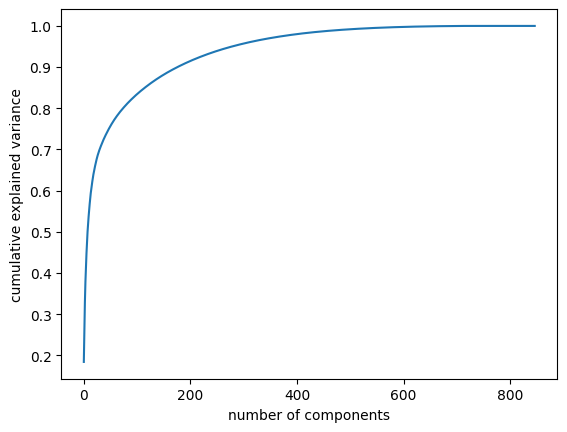

In [ ]:
# plotting to a plot
pca = PCA()
pca.fit(df_all)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


## Clustering

Since the initial aim of the project was to cluster the participants into groups based on their interaction patterns in order to visualize potential outliers, we will now perform clustering on the data.

There are seval clustering algorithms that can be applied on the data, to keep the outliers. As such we will test 3 algorithms: DBSCAN, KMeans and Single-link clustetring.

1. DBSCAN = is nice to outliers but can work unwell with data of "oförutsägbbar" distribution
2. KMeans = does not work well with outliers in theory, because of its centroid algorithm - however it is still worth testing as we have rescaled the data with standardization and min-max
3. Single-link clustering = is nice to outliers but may be computationally more expensive


### Cluster evaluation
We are using non-labeled data for our clusters, and as such we will have to evaluate the clusters based on their internal compactness, connectedness and separation.

Some evaluation suggestions include
1. Inertia (Within-cluster Sum of Squares)
2. Silhouette Score
3. Davies-Bouldin Index
4. Dunn Index

### DBSCAN

min_samples = 2, eps = 0.3

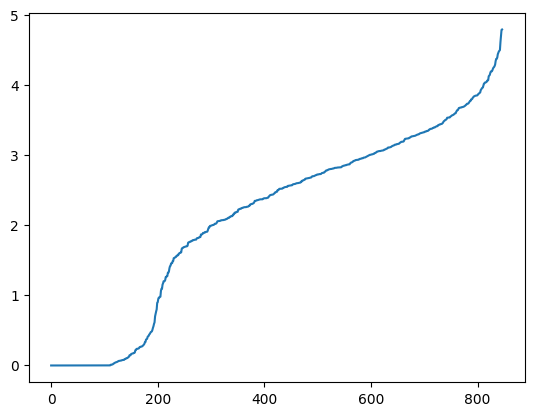

In [ ]:
# decide optimal epsilon value for DBSCAN

from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Based on this plot, it looks like the optimal point for Epsilon (i.e the point of steepest curvature) seems to be around 0.5. We will iterate around values close to this to find the optimal value.

We chose `min_samples` based on domain knowledge. Simply put, in a friend group there will be at least 2 people!

In [ ]:
# perform clustering on the PCA dataframe with dbscan algorithm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Compute DBSCAN3
db = DBSCAN(eps=3.7, min_samples=2).fit(df_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print("Number of clusters: ", len(set(labels)))
print("Number of outlier points: ", list(labels).count(-1))

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_pca, labels))
print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(df_pca, labels))
print("Davies-Bouldin Index: %0.3f" % metrics.davies_bouldin_score(df_pca, labels))




Number of clusters:  7
Number of outlier points:  71
Estimated number of clusters: 6
Silhouette Coefficient: 0.142
Calinski-Harabasz Index: 9.352
Davies-Bouldin Index: 1.876


In [ ]:
# print all the outlier points with the user ids
outlier_indexes = np.where(labels == -1)[0]
print('Number of outliers: ', len(outlier_indexes))

# print("Outlier users: ", outlier_indexes)

# print tthe nr of users in each cluster
for i in range(n_clusters_):
    print("Nr of users in cluster " + str(i) + ": ", list(labels).count(i))


Number of outliers:  71
Nr of users in cluster 0:  765
Nr of users in cluster 1:  2
Nr of users in cluster 2:  2
Nr of users in cluster 3:  2
Nr of users in cluster 4:  2
Nr of users in cluster 5:  3


### KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

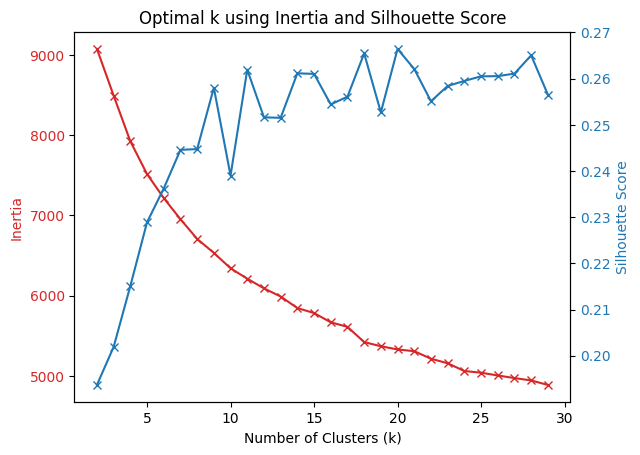

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_all is your data
# For demonstration, let's consider only the first 10 columns (for faster computation)
# df_sample = df_all.iloc[:, :10]
df_sample = df_pca

# Variables to hold the results
inertia_values = []
silhouette_values = []
k_values = range(2, 30)  # Assuming we want to check for k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k).fit(df_sample)
    inertia_values.append(kmeans.inertia_)
    silhouette_values.append(metrics.silhouette_score(df_sample, kmeans.labels_))


# Plotting the results
fig, ax1 = plt.subplots()

# Inertia plot
color = 'tab:red'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_values, inertia_values, color=color, marker='x')
ax1.tick_params(axis='y', labelcolor=color)

# Silhouette Score plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(k_values, silhouette_values, color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Optimal k using Inertia and Silhouette Score')
plt.show()


The plot indicates an elbow point at k=6. We will use this as a starting point for our clustering.

In [ ]:
# perform clustering on the PCA dataframe with k-means algorithm
from sklearn.cluster import KMeans

# Compute k-means
kmeans = KMeans(n_clusters=16).fit(df_pca)
labels = kmeans.labels_

print("Nr of clusters: ", len(set(labels)))
print("Nr of outlier points: ", list(labels).count(-1))

# print amount of people in each cluster
for i in range(len(set(labels))):
    print("Nr of people in cluster ", i, ": ", list(labels).count(i))


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_pca, labels))
print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(df_pca, labels))
print("Davies-Bouldin Index: %0.3f" % metrics.davies_bouldin_score(df_pca, labels))
print("Inertia: ", kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nr of clusters:  16
Nr of outlier points:  0
Nr of people in cluster  0 :  284
Nr of people in cluster  1 :  71
Nr of people in cluster  2 :  66
Nr of people in cluster  3 :  21
Nr of people in cluster  4 :  28
Nr of people in cluster  5 :  46
Nr of people in cluster  6 :  28
Nr of people in cluster  7 :  23
Nr of people in cluster  8 :  31
Nr of people in cluster  9 :  28
Nr of people in cluster  10 :  23
Nr of people in cluster  11 :  28
Nr of people in cluster  12 :  84
Nr of people in cluster  13 :  28
Nr of people in cluster  14 :  40
Nr of people in cluster  15 :  18
Estimated number of clusters: 16
Silhouette Coefficient: 0.250
Calinski-Harabasz Index: 47.197
Davies-Bouldin Index: 2.222
Inertia:  5690.694494353718


In [ ]:
# can you print the users in each cluster
for i in range(n_clusters_):
    print("Users in cluster " + str(i) + ": ", np.where(labels == i)[0])


# save a csv file where each row is a user and the columns are the cluster labels
df_cluster_labels = pd.DataFrame(labels, columns=['cluster_label'])
# add a column with the user ids
df_cluster_labels['user_id'] = df_cluster_labels.index
df_cluster_labels.to_csv("cluster_labels.csv", index=False)

df_cluster_labels.head()


Users in cluster 0:  [  2   7   8   9  11  16  21  24  26  28  33  40  43  59  60  62  66  71
  77  82  86  89 103 110 117 124 125 131 134 135 142 143 150 160 161 162
 184 202 212 213 219 234 241 245 255 270 293 298 305 312 313 316 319 320
 321 329 332 333 337 340 343 346 347 362 377 381 385 387 393 398 410 417
 419 420 426 440 445 446 447 451 460 463 464 477 495 496 498 500 510 511
 516 517 526 533 562 564 565 566 573 574 577 579 581 590 592 594 601 602
 603 604 605 606 609 618 620 622 625 626 628 629 631 635 638 639 641 649
 652 653 654 655 670 674 675 679 681 690 692 693 694 695 696 697 704 705
 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723
 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741
 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759
 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777
 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795
 796 797 798 799 800 801 802 8

,cluster_label,user_id
0,13,0
1,2,1
2,0,2
3,9,3
4,3,4


### Single-link clustering

In [ ]:
# perform clustering on the PCA dataframe with single-link algorithm
from sklearn.cluster import AgglomerativeClustering

# Compute single-link
single_link = AgglomerativeClustering(n_clusters=6).fit(df_pca)
labels = single_link.labels_

print("Number of clusters: ", len(set(labels)))
print("Number of outlier points: ", list(labels).count(-1))

# print amount of people in each cluster
for i in range(len(set(labels))):
    print("Number of people in cluster ", i, ": ", list(labels).count(i))

# evaluate the clustering
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_pca, labels))
print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(df_pca, labels))
print("Davies-Bouldin Index: %0.3f" % metrics.davies_bouldin_score(df_pca, labels))



Number of clusters:  6
Number of outlier points:  0
Number of people in cluster  0 :  229
Number of people in cluster  1 :  86
Number of people in cluster  2 :  78
Number of people in cluster  3 :  340
Number of people in cluster  4 :  78
Number of people in cluster  5 :  36
Silhouette Coefficient: 0.218
Calinski-Harabasz Index: 67.922
Davies-Bouldin Index: 2.483


# Results

Discuss results and implications for research question

In [ ]:
df_pca_comp.shape

NameError: ignored